### Import Required Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from Bio import SeqIO
from Bio.SeqUtils import gc_fraction   

### Load the dataset

In [2]:
file_path = "China Provincial Influenza Surveillance and Climate Dataset.xlsx"

# Read Excel file
data = pd.read_excel(file_path)

# Display first few rows
data.head()

,Province,Cities (Hospitals),Population Size (M),Latitude,Longitude,"Mean Weekly Temp (°C, Summer)","Mean Weekly RH (% , Summer)","Mean Weekly Temp (°C, Winter)","Mean Weekly RH (% , Winter)",Mean Weekly Specimens Tested,Mean Weekly Influenza Positive
0,Hainan,5 (6),4.89,19.6,110.1,27.8,81.7,22,82.6,109,12
1,Guangxi,14 (17),48.12,22.9,108.4,26.5,79.1,16.6,76.2,318,52
2,Guangdong,20 (27),89.20,22.9,113.4,26.7,81.1,17.5,75.0,563,90
3,Yunnan,14 (17),44.57,24.8,103.0,21.1,73.7,13.5,68.5,305,29
4,Fujian,9 (15),39.11,25.3,118.8,24.7,79.7,14.1,76.9,321,56


### Inspect Data

In [3]:
print("Dataset Shape:", data.shape)
print("\nColumns:", data.columns.tolist())
print("\nData Types:\n", data.dtypes)
print("\nMissing Values:\n", data.isnull().sum())

Dataset Shape: (30, 11)

Columns: ['Province', 'Cities (Hospitals)', 'Population Size (M)', 'Latitude', 'Longitude', 'Mean Weekly Temp (°C, Summer)', 'Mean Weekly RH (% , Summer)', 'Mean Weekly Temp (°C, Winter)', 'Mean Weekly RH (% , Winter)', 'Mean Weekly Specimens Tested', 'Mean Weekly Influenza Positive']

Data Types:
 Province                           object
Cities (Hospitals)                 object
Population Size (M)               float64
Latitude                          float64
Longitude                         float64
Mean Weekly Temp (°C, Summer)     float64
Mean Weekly RH (% , Summer)       float64
Mean Weekly Temp (°C, Winter)      object
Mean Weekly RH (% , Winter)       float64
Mean Weekly Specimens Tested        int64
Mean Weekly Influenza Positive      int64
dtype: object

Missing Values:
 Province                          0
Cities (Hospitals)                0
Population Size (M)               0
Latitude                          0
Longitude                         0
M

### Data pre-processing

In [4]:
# Remove duplicate rows if any
data = data.drop_duplicates()

# Check and fill missing numeric values with column mean
data = data.fillna(data.mean(numeric_only=True))

# Clean column names: remove spaces and special characters
data.columns = (
    data.columns
    .str.strip()
    .str.replace(' ', '_')
    .str.replace('(', '', regex=False)
    .str.replace(')', '', regex=False)
)

# Show cleaned dataset structure
print(" Cleaned Excel Dataset Info ")
data.info()



# LOAD FASTA SEQUENCE DATA
from Bio import SeqIO
from Bio.SeqUtils import gc_fraction   

fasta_sequences = list(SeqIO.parse("FASTA.fa", "fasta"))



# EXTRACT FEATURES FROM FASTA SEQUENCES

sequence_features = []
for seq in fasta_sequences:
    sequence_features.append({
        "Sequence_ID": seq.id,
        "Sequence_Length": len(seq.seq),
        "GC_Content": gc_fraction(seq.seq) * 100 
    })

sequence_df = pd.DataFrame(sequence_features)

print("\n Extracted FASTA Sequence Features ")
print(sequence_df.head())



# MERGE EXCEL DATA WITH FASTA FEATURES 
merged_df = pd.concat(
    [data.reset_index(drop=True), sequence_df.reset_index(drop=True)],
    axis=1
)

print("\n Final Merged Dataset Info ")
merged_df.info()

# Display first rows of merged dataset
merged_df.head()

 Cleaned Excel Dataset Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Province                        30 non-null     object 
 1   Cities_Hospitals                30 non-null     object 
 2   Population_Size_M               30 non-null     float64
 3   Latitude                        30 non-null     float64
 4   Longitude                       30 non-null     float64
 5   Mean_Weekly_Temp_°C,_Summer     30 non-null     float64
 6   Mean_Weekly_RH_%_,_Summer       30 non-null     float64
 7   Mean_Weekly_Temp_°C,_Winter     30 non-null     object 
 8   Mean_Weekly_RH_%_,_Winter       30 non-null     float64
 9   Mean_Weekly_Specimens_Tested    30 non-null     int64  
 10  Mean_Weekly_Influenza_Positive  30 non-null     int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.7+ KB

 Extracted F

,Province,Cities_Hospitals,Population_Size_M,Latitude,Longitude,"Mean_Weekly_Temp_°C,_Summer","Mean_Weekly_RH_%_,_Summer","Mean_Weekly_Temp_°C,_Winter","Mean_Weekly_RH_%_,_Winter",Mean_Weekly_Specimens_Tested,Mean_Weekly_Influenza_Positive,Sequence_ID,Sequence_Length,GC_Content
0,Hainan,5 (6),4.89,19.6,110.1,27.8,81.7,22,82.6,109.0,12.0,AHZ60096,560,57.608696
1,Guangxi,14 (17),48.12,22.9,108.4,26.5,79.1,16.6,76.2,318.0,52.0,AFM78646,566,55.494505
2,Guangdong,20 (27),89.20,22.9,113.4,26.7,81.1,17.5,75.0,563.0,90.0,AHZ39686,560,57.608696
3,Yunnan,14 (17),44.57,24.8,103.0,21.1,73.7,13.5,68.5,305.0,29.0,AHZ39698,560,57.608696
4,Fujian,9 (15),39.11,25.3,118.8,24.7,79.7,14.1,76.9,321.0,56.0,AHZ39710,560,57.608696


### Exploratory Data Analysis

,Population_Size_M,Latitude,Longitude,"Mean_Weekly_Temp_°C,_Summer","Mean_Weekly_RH_%_,_Summer","Mean_Weekly_RH_%_,_Winter",Mean_Weekly_Specimens_Tested,Mean_Weekly_Influenza_Positive
count,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000
mean,43.647333,33.360000,112.720000,21.37000,68.877667,65.276667,257.733333,38.933333
std,26.371849,6.828369,8.062831,3.80337,10.318002,10.688592,113.551730,20.176691
min,4.890000,19.600000,87.600000,10.20000,43.100000,42.600000,109.000000,12.000000
25%,24.455000,28.550000,107.200000,19.22500,62.175000,55.575000,188.250000,23.250000
50%,39.435000,33.600000,113.050000,21.65000,70.400000,64.450000,239.500000,34.500000
75%,55.470000,38.025000,118.175000,24.17500,77.147500,74.775000,317.750000,50.000000
max,100.050000,46.100000,126.200000,27.80000,81.700000,82.600000,563.000000,90.000000


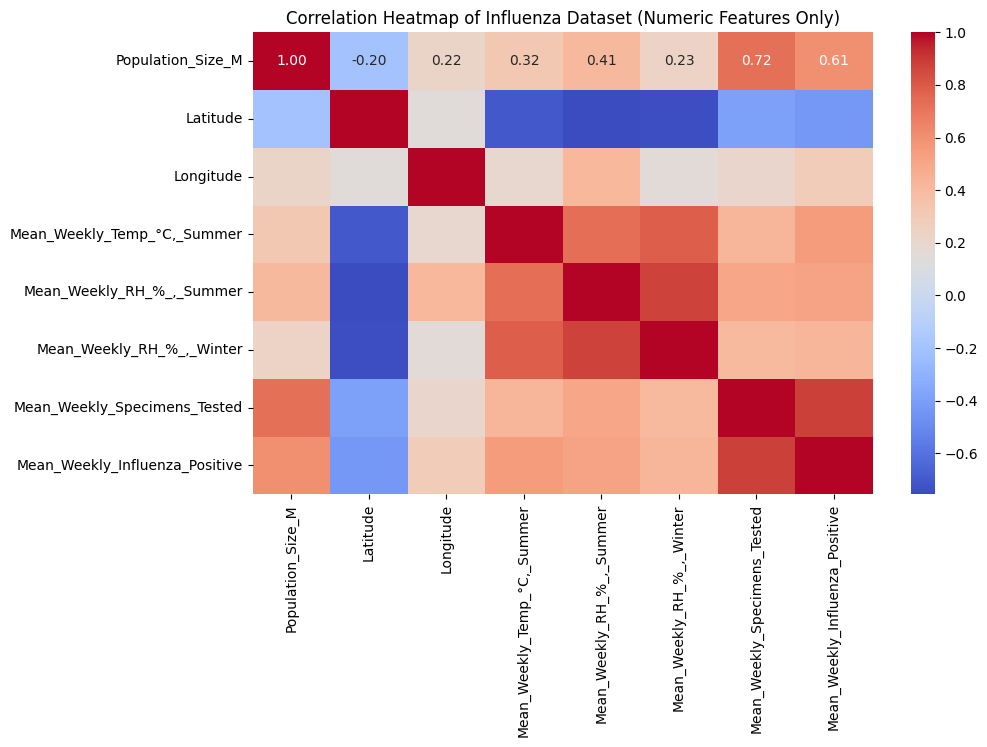

In [5]:
# Summary statistics
display(data.describe())

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Correlation matrix 
plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Influenza Dataset (Numeric Features Only)")
plt.show()

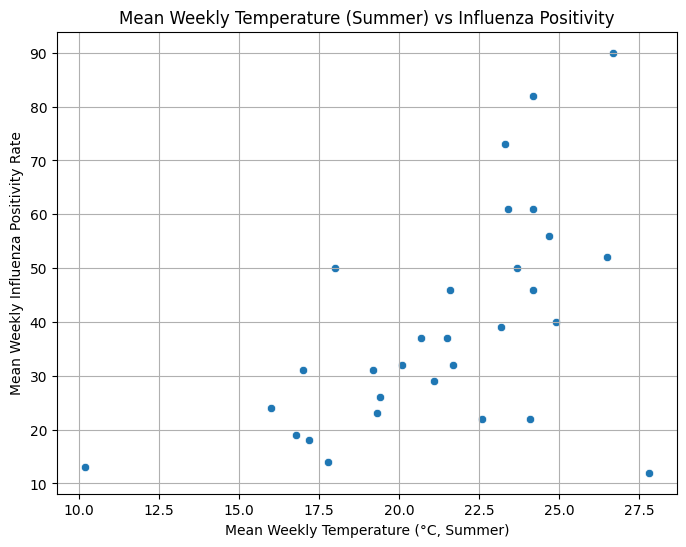

In [6]:
correct_temp_col = 'Mean_Weekly_Temp_°C,_Summer'

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=correct_temp_col,
    y='Mean_Weekly_Influenza_Positive',
    data=merged_df
)
plt.title('Mean Weekly Temperature (Summer) vs Influenza Positivity')
plt.xlabel('Mean Weekly Temperature (°C, Summer)')
plt.ylabel('Mean Weekly Influenza Positivity Rate')
plt.grid(True)
plt.show()

E:\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


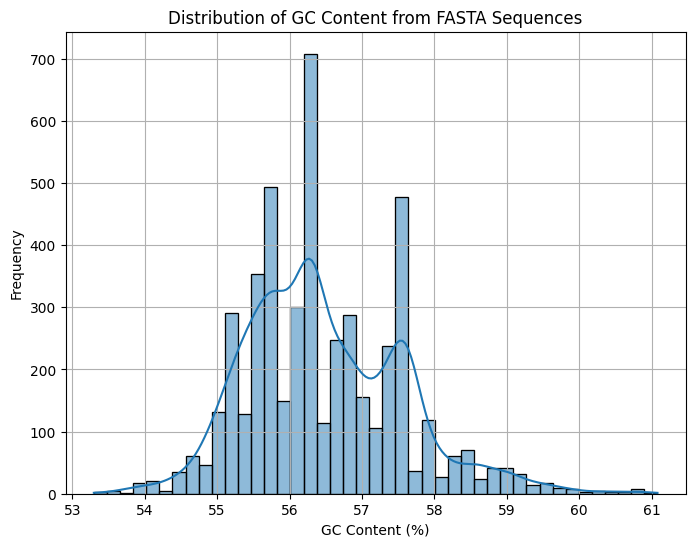

In [7]:
# GC Content Distribution
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['GC_Content'], kde=True)
plt.title('Distribution of GC Content from FASTA Sequences')
plt.xlabel('GC Content (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

E:\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


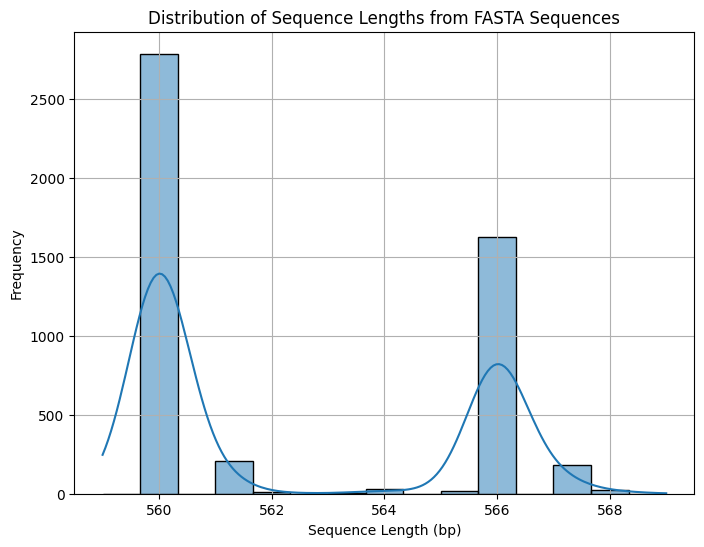

In [8]:
# Sequence Length Distribution
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['Sequence_Length'], kde=True)
plt.title('Distribution of Sequence Lengths from FASTA Sequences')
plt.xlabel('Sequence Length (bp)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

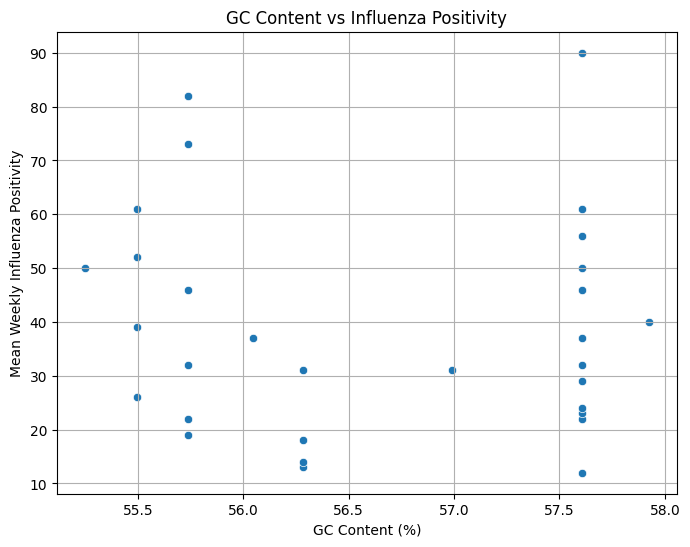

In [9]:
# Relationship Between GC Content and Influenza Positivity
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='GC_Content',
    y='Mean_Weekly_Influenza_Positive',
    data=merged_df
)
plt.title('GC Content vs Influenza Positivity')
plt.xlabel('GC Content (%)')
plt.ylabel('Mean Weekly Influenza Positivity')
plt.grid(True)
plt.show()

### Robust numeric cleaning and scaling

In [10]:
from sklearn.preprocessing import StandardScaler


# Climate & influenza-related features from the Excel dataset
climate_cols = merged_df.filter(regex='Population|Temp|RH|Specimens', axis=1).columns.tolist()

# Add sequence-derived features from FASTA file
sequence_cols = ['Sequence_Length', 'GC_Content']

# Combine into a full model feature set
feature_cols = climate_cols + sequence_cols
print("Selected Feature Columns:", feature_cols)

# Target variable
target_col = 'Mean_Weekly_Influenza_Positive'


def clean_numeric_column(df, col):
    """Cleans non-numeric characters, normalises minus signs, converts to float."""
    cleaned = (
        df[col]
        .astype(str)
        .str.replace('\u2212', '-', regex=False)      
        .str.replace('−', '-', regex=False)           
        .str.replace(r'[^0-9eE\.\-\+]', '', regex=True)
    )

    df[col] = pd.to_numeric(cleaned, errors='coerce')
    n_nan = df[col].isna().sum()

    # Fill NaN with column mean
    if n_nan > 0:
        if df[col].notna().sum() > 0:
            mean_val = df[col].mean()
            df[col].fillna(mean_val, inplace=True)
            print(f"Column '{col}': NaNs filled with mean = {mean_val:.4f}")
        else:
            print(f"WARNING: Column '{col}' contains no valid numeric values!")

    return df



# Clean all selected feature columns
for col in feature_cols:
    merged_df = clean_numeric_column(merged_df, col)


if target_col in merged_df.columns:
    merged_df = clean_numeric_column(merged_df, target_col)
else:
    raise KeyError(f"Target column '{target_col}' not found in merged_df.")


X_clean = merged_df[feature_cols].copy()
y = merged_df[target_col].astype(float)

print("\nFinal Feature Dtypes:\n", X_clean.dtypes)
print("\nRemaining NaNs in Features:\n", X_clean.isna().sum())


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

print("\nX_scaled Shape:", X_scaled.shape)

Selected Feature Columns: ['Population_Size_M', 'Mean_Weekly_Temp_°C,_Summer', 'Mean_Weekly_RH_%_,_Summer', 'Mean_Weekly_Temp_°C,_Winter', 'Mean_Weekly_RH_%_,_Winter', 'Mean_Weekly_Specimens_Tested', 'Sequence_Length', 'GC_Content']
Column 'Population_Size_M': NaNs filled with mean = 43.6473
Column 'Mean_Weekly_Temp_°C,_Summer': NaNs filled with mean = 21.3700
Column 'Mean_Weekly_RH_%_,_Summer': NaNs filled with mean = 68.8777
Column 'Mean_Weekly_Temp_°C,_Winter': NaNs filled with mean = 5.8467
Column 'Mean_Weekly_RH_%_,_Winter': NaNs filled with mean = 65.2767
Column 'Mean_Weekly_Specimens_Tested': NaNs filled with mean = 257.7333
Column 'Mean_Weekly_Influenza_Positive': NaNs filled with mean = 38.9333

Final Feature Dtypes:
 Population_Size_M               float64
Mean_Weekly_Temp_°C,_Summer     float64
Mean_Weekly_RH_%_,_Summer       float64
Mean_Weekly_Temp_°C,_Winter     float64
Mean_Weekly_RH_%_,_Winter       float64
Mean_Weekly_Specimens_Tested    float64
Sequence_Length        

### Split Data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

### Predictive Modelling

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd


models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(
        random_state=42,
        n_estimators=200,
        max_depth=None
    ),
    'Gradient Boosting Regressor': GradientBoostingRegressor(
        random_state=42,
        learning_rate=0.05,
        n_estimators=150
    ),
    'Support Vector Regression (SVR)': SVR(kernel='rbf', C=2.0, epsilon=0.1),
    'XGBoost Regressor': XGBRegressor(
        random_state=42,
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='reg:squarederror'
    )
}

results = {}


for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    results[name] = {
        'R2 Score': r2_score(y_test, predictions),
        'RMSE': np.sqrt(mean_squared_error(y_test, predictions)),
        'MAE': mean_absolute_error(y_test, predictions)
    }


results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='R2 Score', ascending=False)

print(" Model Performance Comparison ")
display(results_df)



tree_models = ['Random Forest Regressor', 'Gradient Boosting Regressor', 'XGBoost Regressor']

for name in tree_models:
    model = models[name]
    if hasattr(model, "feature_importances_"):
        importance_df = pd.DataFrame({
            'Feature': feature_cols,
            'Importance': model.feature_importances_
        }).sort_values(by='Importance', ascending=False)

        print(f"\n Feature Importance: {name} ")
        display(importance_df)

 Model Performance Comparison 


,R2 Score,RMSE,MAE
Linear Regression,0.726647,0.959171,0.061941
Gradient Boosting Regressor,0.684167,1.031009,0.043457
Random Forest Regressor,0.675125,1.045663,0.049498
XGBoost Regressor,0.609244,1.146798,0.052136
Support Vector Regression (SVR),0.002118,1.832625,0.200931



 Feature Importance: Random Forest Regressor 


,Feature,Importance
5,Mean_Weekly_Specimens_Tested,0.496082
0,Population_Size_M,0.157412
1,"Mean_Weekly_Temp_°C,_Summer",0.128970
3,"Mean_Weekly_Temp_°C,_Winter",0.115513
2,"Mean_Weekly_RH_%_,_Summer",0.066302
4,"Mean_Weekly_RH_%_,_Winter",0.025101
7,GC_Content,0.008968
6,Sequence_Length,0.001652



 Feature Importance: Gradient Boosting Regressor 


,Feature,Importance
5,Mean_Weekly_Specimens_Tested,0.579764
0,Population_Size_M,0.177294
1,"Mean_Weekly_Temp_°C,_Summer",0.126301
3,"Mean_Weekly_Temp_°C,_Winter",0.066420
2,"Mean_Weekly_RH_%_,_Summer",0.026081
4,"Mean_Weekly_RH_%_,_Winter",0.013048
6,Sequence_Length,0.006032
7,GC_Content,0.005060



 Feature Importance: XGBoost Regressor 


,Feature,Importance
5,Mean_Weekly_Specimens_Tested,0.417067
0,Population_Size_M,0.121609
2,"Mean_Weekly_RH_%_,_Summer",0.108503
3,"Mean_Weekly_Temp_°C,_Winter",0.100768
1,"Mean_Weekly_Temp_°C,_Summer",0.093394
4,"Mean_Weekly_RH_%_,_Winter",0.076282
7,GC_Content,0.060108
6,Sequence_Length,0.022270


### Model Comparison

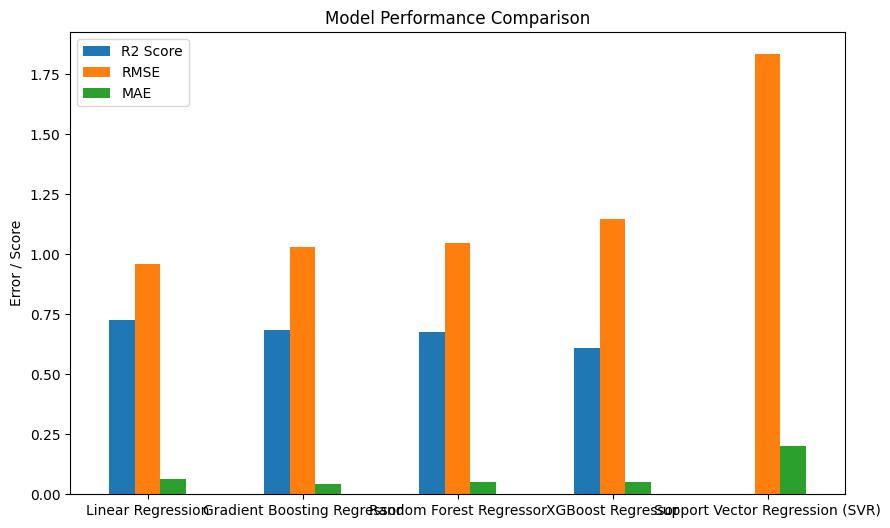

In [13]:
results_df.plot(kind='bar', figsize=(10,6))
plt.title('Model Performance Comparison')
plt.ylabel('Error / Score')
plt.xticks(rotation=0)
plt.show()

### Feature Importance (using Random Forest)

Models trained successfully.


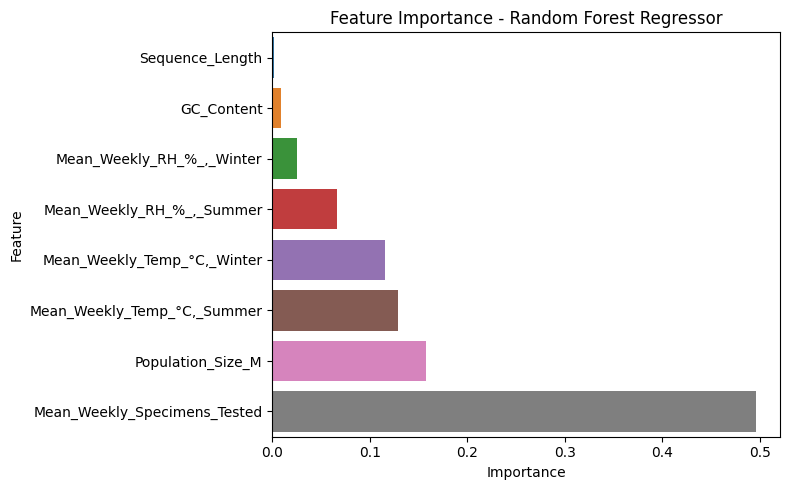

In [14]:
# Rebuild models dictionary 
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42, n_estimators=200),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
}

# Train every model
for name, model in models.items():
    model.fit(X_train, y_train)

print("Models trained successfully.")


# Correct key for RandomForestRegressor
rf_model = models.get('Random Forest Regressor')

if rf_model is None:
    raise KeyError("Random Forest Regressor model not found in models dictionary.")


if 'X_clean' in globals():
    feature_names = X_clean.columns.tolist()
elif 'feature_cols' in globals():
    feature_names = feature_cols
else:
    raise NameError("Feature names not found. Ensure X_clean or feature_cols exists.")


importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)


plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Cross Validation

In [15]:
# Correct key name for Gradient Boosting model
cv_scores = cross_val_score(models['Gradient Boosting Regressor'], X_scaled, y, cv=5)

print("Gradient Boosting Regressor Cross-Validation Scores:", cv_scores)
print("Average CV Score:", np.mean(cv_scores))

Gradient Boosting Regressor Cross-Validation Scores: [ 3.33066907e-16 -3.13534513e+17 -3.13534513e+17 -3.13534513e+17
 -3.13391681e+17]
Average CV Score: -2.5079904372495744e+17


In [16]:
!pip install biopython

Defaulting to user installation because normal site-packages is not writeable


### Import Libraries for Sequence Analysis

In [17]:
from Bio import SeqIO
from Bio.SeqUtils import molecular_weight, gc_fraction  
from Bio import pairwise2
from Bio.Align import substitution_matrices
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\Bio\pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


### Load FASTA sequences

In [18]:
fasta_file = "FASTA.fa"

# Parse FASTA file and store sequences
records = list(SeqIO.parse(fasta_file, "fasta"))
print(f"Total sequences loaded: {len(records)}\n")

# Display basic info
for record in records:
    print(f"ID: {record.id}")
    print(f"Description: {record.description}")
    print(f"Sequence length: {len(record.seq)}\n")

Total sequences loaded: 4894

ID: AHZ60096
Description: AHZ60096 A/Anhui/1-DEWH730/2013 2013// HA
Sequence length: 560

ID: AFM78646
Description: AFM78646 A/Anhui/1225/2010 2010/01/14 HA
Sequence length: 566

ID: AHZ39686
Description: AHZ39686 A/Anhui/DEWH72-01/2013 2013// HA
Sequence length: 560

ID: AHZ39698
Description: AHZ39698 A/Anhui/DEWH72-02/2013 2013// HA
Sequence length: 560

ID: AHZ39710
Description: AHZ39710 A/Anhui/DEWH72-03/2013 2013// HA
Sequence length: 560

ID: AHZ39722
Description: AHZ39722 A/Anhui/DEWH72-04/2013 2013// HA
Sequence length: 560

ID: AHZ39734
Description: AHZ39734 A/Anhui/DEWH72-05/2013 2013// HA
Sequence length: 560

ID: AHZ39746
Description: AHZ39746 A/Anhui/DEWH72-06/2013 2013// HA
Sequence length: 560

ID: AHZ39758
Description: AHZ39758 A/Anhui/DEWH72-07/2013 2013// HA
Sequence length: 560

ID: AHZ39770
Description: AHZ39770 A/Anhui/DEWH72-08/2013 2013// HA
Sequence length: 560

ID: AHZ39782
Description: AHZ39782 A/Anhui/DEWH72-09/2013 2013// HA
Seq

### Create a DataFrame summarizing basic sequence statistics

In [19]:
from Bio.SeqUtils import gc_fraction  

import re

data = []
for record in records:
    seq = str(record.seq).upper()
    
    # Clean sequence: remove any characters not in standard 20 amino acids
    seq_clean = re.sub(r'[^ACDEFGHIKLMNPQRSTVWY]', '', seq)
    
    # Compute GC content
    try:
        gc_pct = float(gc_fraction(seq_clean) * 100)
    except Exception:
        gc_pct = 0.0  
    
    # Compute molecular weight safely
    try:
        mw = molecular_weight(seq_clean, seq_type='protein')
    except ValueError:
        mw = None  

    data.append({
        "ID": record.id,
        "Description": record.description,
        "Length": len(seq_clean),
        "GC_Content(%)": round(gc_pct, 2),
        "Molecular_Weight(Da)": round(mw, 2) if mw else "N/A"
    })

seq_df = pd.DataFrame(data)
print("Summary of Sequences:\n")
display(seq_df)

Summary of Sequences:



,ID,Description,Length,GC_Content(%),Molecular_Weight(Da)
0,AHZ60096,AHZ60096 A/Anhui/1-DEWH730/2013 2013// HA,560,57.61,62108.66
1,AFM78646,AFM78646 A/Anhui/1225/2010 2010/01/14 HA,566,55.49,63214.83
2,AHZ39686,AHZ39686 A/Anhui/DEWH72-01/2013 2013// HA,560,57.61,62108.66
3,AHZ39698,AHZ39698 A/Anhui/DEWH72-02/2013 2013// HA,560,57.61,62107.68
4,AHZ39710,AHZ39710 A/Anhui/DEWH72-03/2013 2013// HA,560,57.61,62109.65
...,...,...,...,...,...
4889,AHG26443,AHG26443 A/wild waterfowl/Dongting/PC2559/2012...,560,55.00,62539.90
4890,AHG26455,AHG26455 A/wild waterfowl/Dongting/PC2560/2012...,560,54.64,62443.73
4891,AHG26467,AHG26467 A/wild waterfowl/Dongting/PC2562/2012...,560,55.43,62371.66
4892,AHG26479,AHG26479 A/wild waterfowl/Dongting/PC2574/2012...,560,54.95,62527.80


### EDA using Sequence Data

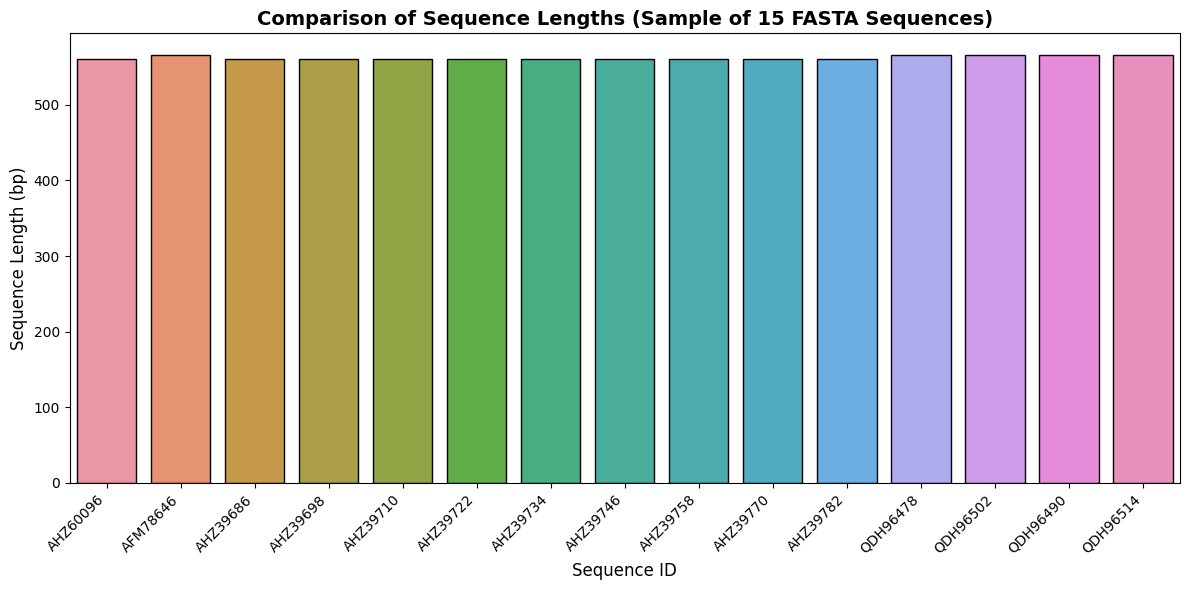

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Take a small sample for readability (first 15 sequences)
seq_sample = sequence_df.head(15)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=seq_sample,
    x="Sequence_ID",
    y="Sequence_Length",
    edgecolor="black"
)

plt.title("Comparison of Sequence Lengths (Sample of 15 FASTA Sequences)", fontsize=14, fontweight='bold')
plt.ylabel("Sequence Length (bp)", fontsize=12)
plt.xlabel("Sequence ID", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

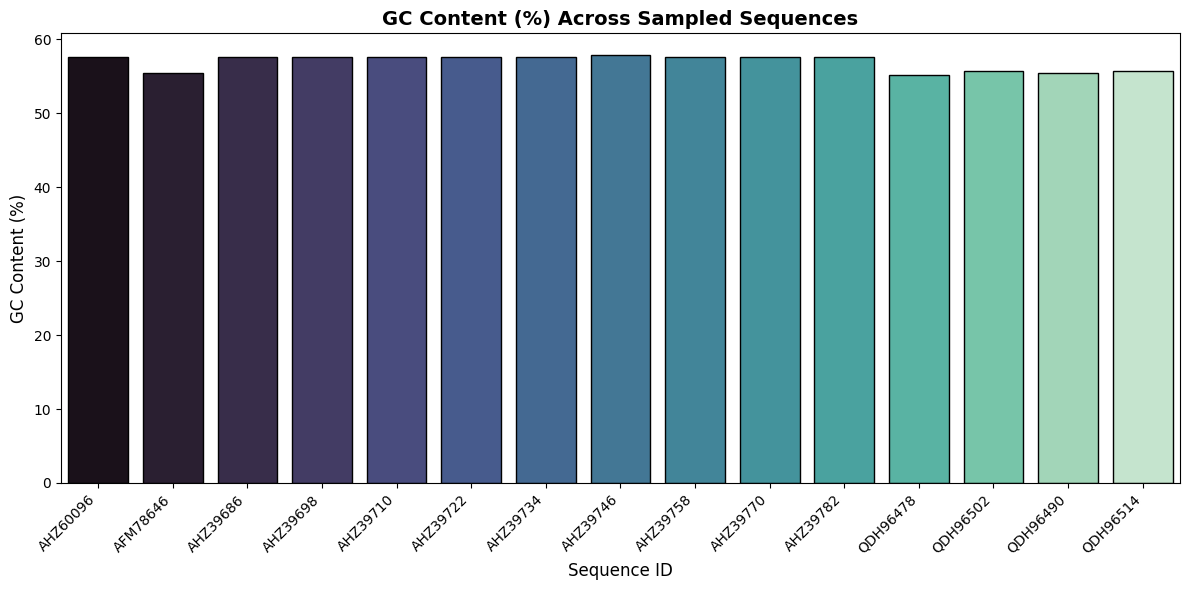

In [21]:
x_col = "Sequence_ID"  

# Determine GC column name
if "GC_Content(%)" in seq_sample.columns:
    y_col = "GC_Content(%)"
elif "GC_Content" in seq_sample.columns:
    y_col = "GC_Content"
else:
    raise KeyError("GC content column not found. Check your FASTA feature extraction step.")

# GC Content Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=seq_sample, x=x_col, y=y_col, palette="mako", edgecolor="black")
plt.title("GC Content (%) Across Sampled Sequences", fontsize=14, fontweight='bold')
plt.ylabel("GC Content (%)", fontsize=12)
plt.xlabel("Sequence ID", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

### Perform pairwise sequence alignments (global alignment using BLOSUM62)

Pairwise Sequence Alignment Scores (Top 10 Sequences):



,Seq1_ID,Seq2_ID,Alignment_Score
0,AHZ60096,AFM78646,1160.0
1,AHZ60096,AHZ39686,2956.0
2,AHZ60096,AHZ39698,2951.0
3,AHZ60096,AHZ39710,2951.0
4,AHZ60096,AHZ39722,2951.0
5,AHZ60096,AHZ39734,2951.0
6,AHZ60096,AHZ39746,2946.0
7,AHZ60096,AHZ39758,2951.0
8,AHZ60096,AHZ39770,2951.0
9,AFM78646,AHZ39686,1160.0


E:\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


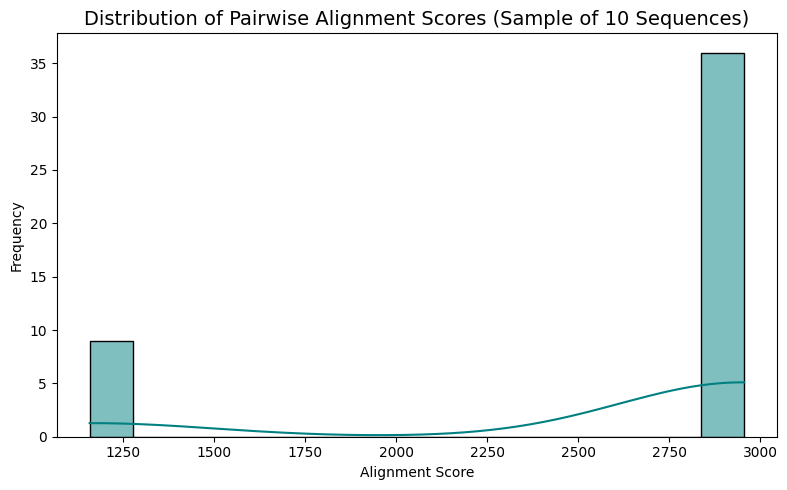

In [22]:
from Bio import pairwise2
from Bio.Align import substitution_matrices
import pandas as pd

# Load substitution matrix
matrix = substitution_matrices.load("BLOSUM62")

# Use a smaller subset for demonstration 
subset_records = records[:10]

alignments = []

# Perform global alignments between all unique pairs in the subset
for i in range(len(subset_records)):
    for j in range(i + 1, len(subset_records)):
        seq1 = str(subset_records[i].seq)
        seq2 = str(subset_records[j].seq)

        try:
            alignment = pairwise2.align.globalds(
                seq1, seq2, matrix, -10, -1, one_alignment_only=True
            )[0]
            score = alignment.score
        except Exception as e:
            score = None  

        alignments.append({
            "Seq1_ID": subset_records[i].id,
            "Seq2_ID": subset_records[j].id,
            "Alignment_Score": score
        })

# Convert results to DataFrame
align_df = pd.DataFrame(alignments)

print("Pairwise Sequence Alignment Scores (Top 10 Sequences):\n")
display(align_df.head(20))

# Visualize alignment score distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(data=align_df, x="Alignment_Score", bins=15, kde=True, color='teal')
plt.title("Distribution of Pairwise Alignment Scores (Sample of 10 Sequences)", fontsize=14)
plt.xlabel("Alignment Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### Top 10 alignments by score

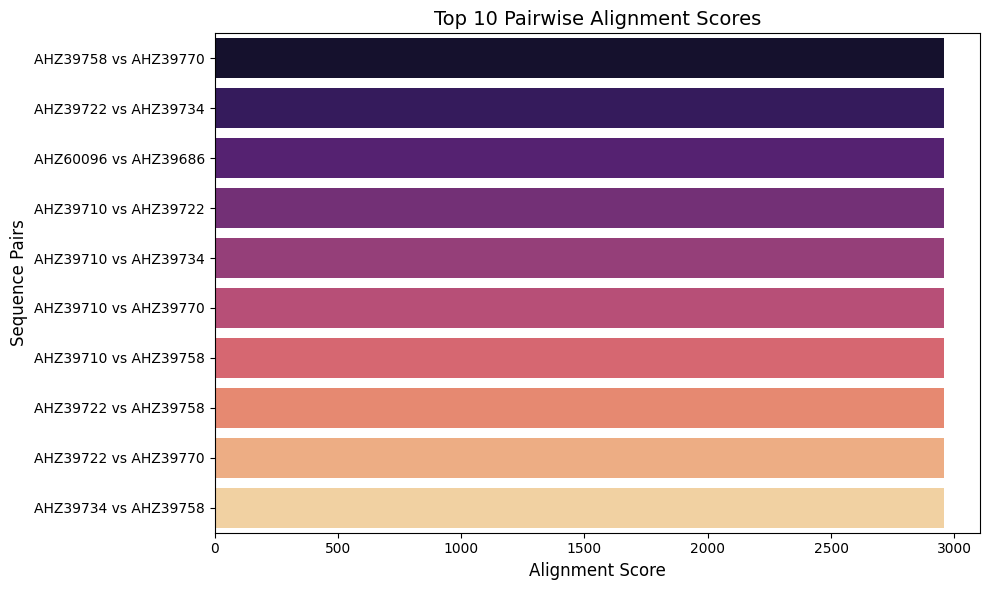

In [23]:
top_alignments = align_df.sort_values(by="Alignment_Score", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    x="Alignment_Score",
    y=top_alignments.apply(lambda row: f"{row.Seq1_ID} vs {row.Seq2_ID}", axis=1),
    data=top_alignments,
    palette="magma"
)
plt.title("Top 10 Pairwise Alignment Scores", fontsize=14)
plt.xlabel("Alignment Score", fontsize=12)
plt.ylabel("Sequence Pairs", fontsize=12)
plt.tight_layout()
plt.show()

### Identify the most similar sequence pairs

In [24]:
best_alignment = align_df.loc[align_df['Alignment_Score'].idxmax()]
print("Most Similar Sequences:")
print(best_alignment)

Most Similar Sequences:
Seq1_ID            AHZ60096
Seq2_ID            AHZ39686
Alignment_Score      2956.0
Name: 1, dtype: object


In [25]:
output_folder = r"E:\Dataset"

seq_df.to_csv(f"{output_folder}\\sequence_summary.csv", index=False)
align_df.to_csv(f"{output_folder}\\pairwise_alignment_scores.csv", index=False)

print(f"Sequence analysis results have been saved successfully to {output_folder}.")

Sequence analysis results have been saved successfully to E:\Dataset.


### Perform a Simple Multiple Sequence Alignment in Python

In [26]:
from Bio import SeqIO
from Bio.Align import MultipleSeqAlignment
from Bio.Align import PairwiseAligner
import pandas as pd

# Load sequences from FASTA
fasta_file = "FASTA.fa"  # Path to your uploaded FASTA file
records = list(SeqIO.parse(fasta_file, "fasta"))
print(f"Total sequences loaded: {len(records)}")

# Use a smaller subset if dataset is large
subset_records = records[:50]  # first 50 sequences for demo alignment

# Initialize pairwise aligner
aligner = PairwiseAligner()
aligner.mode = "global"  # global alignment

# Start with first sequence as reference
aligned_seqs = [subset_records[0].seq]

# Align each subsequent sequence to the first sequence
for record in subset_records[1:]:
    alignment = aligner.align(aligned_seqs[0], record.seq)[0]
    aligned_seqs.append(alignment.target)

# Build MultipleSeqAlignment object
msa = MultipleSeqAlignment([
    SeqIO.SeqRecord(seq, id=record.id, description=record.description)
    for seq, record in zip(aligned_seqs, subset_records)
])

# Convert alignment to DataFrame
alignment_data = {rec.id: list(rec.seq) for rec in msa}
aligned_df = pd.DataFrame(alignment_data).T

# Save aligned sequences subset to CSV
aligned_df.to_csv(r"E:\Dataset\aligned_sequences_subset.csv")

print(f"Subset aligned sequences saved. Shape: {aligned_df.shape}")
display(aligned_df.head())

Total sequences loaded: 4894
Subset aligned sequences saved. Shape: (50, 560)


,0,1,2,3,4,5,6,7,8,9,...,550,551,552,553,554,555,556,557,558,559
AHZ60096,M,N,T,Q,I,L,V,F,A,L,...,N,G,N,M,R,C,T,I,C,I
AFM78646,M,N,T,Q,I,L,V,F,A,L,...,N,G,N,M,R,C,T,I,C,I
AHZ39686,M,N,T,Q,I,L,V,F,A,L,...,N,G,N,M,R,C,T,I,C,I
AHZ39698,M,N,T,Q,I,L,V,F,A,L,...,N,G,N,M,R,C,T,I,C,I
AHZ39710,M,N,T,Q,I,L,V,F,A,L,...,N,G,N,M,R,C,T,I,C,I


### Highlight conserved and variable positions

In [27]:
# Ensure all entries in aligned_df are strings
aligned_df_clean = aligned_df.applymap(lambda x: str(x).upper())

# Compute conservation fraction per column
conservation = []
for col in aligned_df_clean.columns:
    counts = aligned_df_clean[col].value_counts()
    most_common_frac = counts.max() / counts.sum()
    conservation.append(most_common_frac)

# Convert to NumPy array and create DataFrame
conservation_array = np.array(conservation, dtype=float)
conservation_df = pd.DataFrame({
    'Position': range(1, len(conservation_array)+1),
    'Conservation': conservation_array
})

# Identify highly conserved and variable positions
highly_conserved = conservation_df[conservation_df['Conservation'] >= 0.9]
variable_positions = conservation_df[conservation_df['Conservation'] <= 0.5]

print(f"Number of highly conserved positions (≥0.9): {len(highly_conserved)}")
print(f"Number of variable positions (≤0.5): {len(variable_positions)}")

Number of highly conserved positions (≥0.9): 560
Number of variable positions (≤0.5): 0


C:\Users\hp\AppData\Local\Temp\ipykernel_19280\3702908683.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  aligned_df_clean = aligned_df.applymap(lambda x: str(x).upper())


### Amino acid frequency heatmap

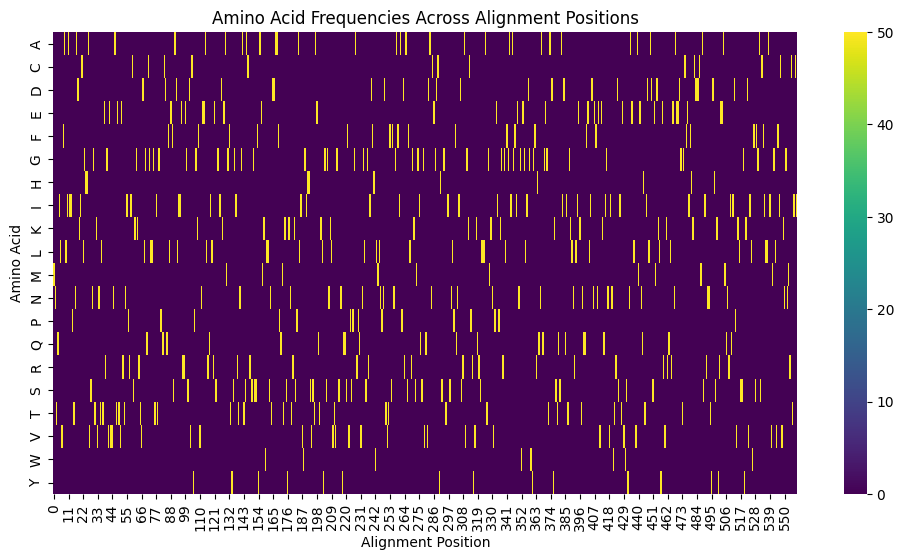

In [28]:
aa_list = list('ACDEFGHIKLMNPQRSTVWY')
freq_matrix = pd.DataFrame(index=aa_list, columns=aligned_df.columns, data=0)

for col in aligned_df.columns:
    counts = aligned_df[col].value_counts()
    for aa in counts.index:
        if aa in aa_list:
            freq_matrix.loc[aa, col] = counts[aa]

plt.figure(figsize=(12,6))
sns.heatmap(freq_matrix, cmap='viridis')
plt.title('Amino Acid Frequencies Across Alignment Positions')
plt.xlabel('Alignment Position')
plt.ylabel('Amino Acid')
plt.show()

### Save conservation and frequency data

In [29]:
conservation_df.to_csv(r"E:\Dataset\sequence_conservation.csv", index=False)
freq_matrix.to_csv(r"E:\Dataset\aa_frequency_matrix.csv")

print("Sequence conservation and frequency data saved successfully.")

Sequence conservation and frequency data saved successfully.


### Visualize Sequence Conservation with Highlighted Positions

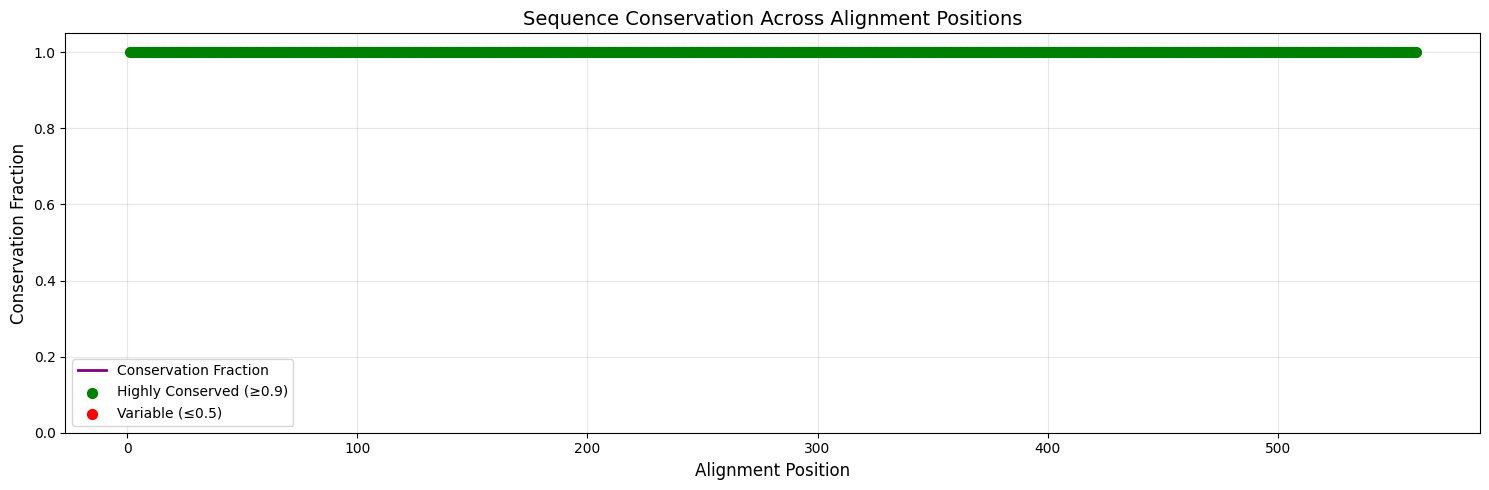

In [30]:
plt.figure(figsize=(15,5))

# Plot conservation line
plt.plot(conservation_df['Position'], conservation_df['Conservation'], color='purple', linewidth=2, label='Conservation Fraction')

# Highlight highly conserved positions (>=0.9)
plt.scatter(highly_conserved['Position'], highly_conserved['Conservation'], color='green', s=50, label='Highly Conserved (≥0.9)', zorder=5)

# Highlight variable positions (<=0.5)
plt.scatter(variable_positions['Position'], variable_positions['Conservation'], color='red', s=50, label='Variable (≤0.5)', zorder=5)

plt.title('Sequence Conservation Across Alignment Positions', fontsize=14)
plt.xlabel('Alignment Position', fontsize=12)
plt.ylabel('Conservation Fraction', fontsize=12)
plt.ylim(0,1.05)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

### Feature Importance & Interpretation

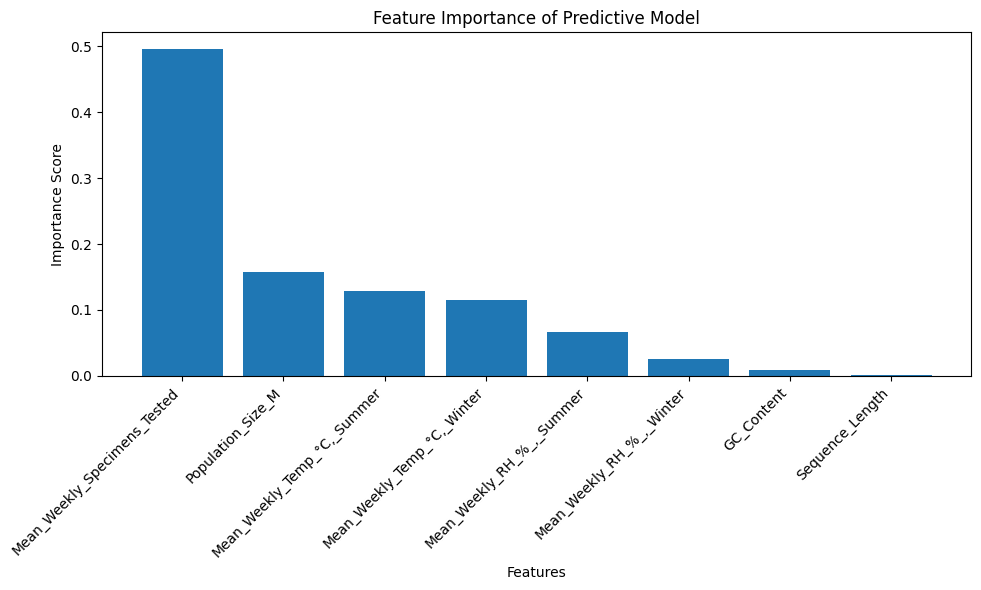

,Feature,Importance
5,Mean_Weekly_Specimens_Tested,0.496082
0,Population_Size_M,0.157412
1,"Mean_Weekly_Temp_°C,_Summer",0.128970
3,"Mean_Weekly_Temp_°C,_Winter",0.115513
2,"Mean_Weekly_RH_%_,_Summer",0.066302
4,"Mean_Weekly_RH_%_,_Winter",0.025101
7,GC_Content,0.008968
6,Sequence_Length,0.001652


In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Define final_model
final_model = models['Random Forest Regressor']


# Rebuild scaled feature DataFrame
scaled_features_df = pd.DataFrame(X_scaled, columns=X_clean.columns)


# Extract feature importances
if hasattr(final_model, "feature_importances_"):
    importances = final_model.feature_importances_
else:
    raise AttributeError("Selected model does not support feature_importances_. Choose a tree-based model.")


feature_names = scaled_features_df.columns

# Create DataFrame
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.bar(fi_df['Feature'], fi_df['Importance'])
plt.title("Feature Importance of Predictive Model")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Display Importance Table 
fi_df

### Correlation Heatmap

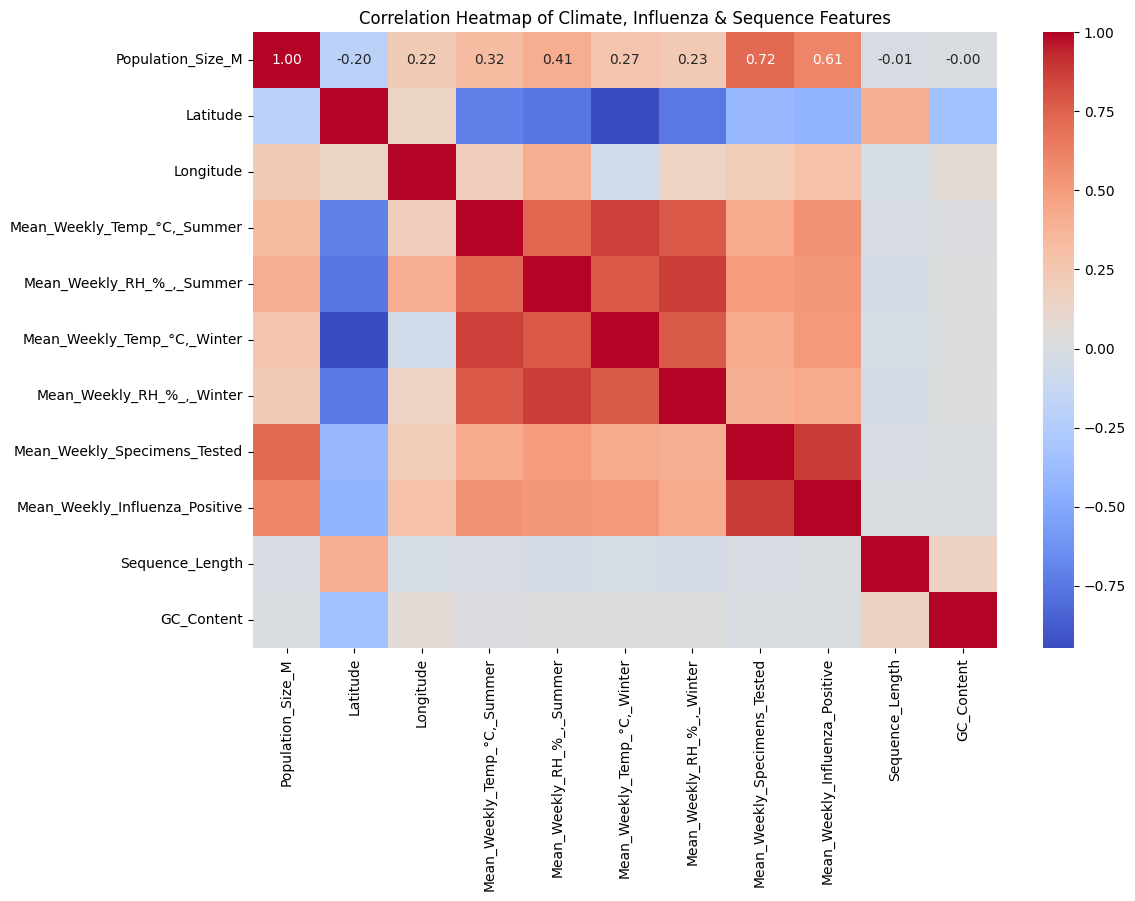

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric features from merged dataset
numeric_cols = merged_df.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Climate, Influenza & Sequence Features")
plt.show()